In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [2]:
pingwiny = pd.read_csv('penguins.csv')
pingwiny

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [3]:
pingwiny[pingwiny['CulmenLength'].isnull()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [4]:
pingwiny.dropna(inplace = True)

In [5]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = pingwiny[features], pingwiny[target]

In [6]:
pingwiny.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.757310
std,5.459584,1.974793,14.061714,801.954536,0.763648
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [7]:
pingwiny['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

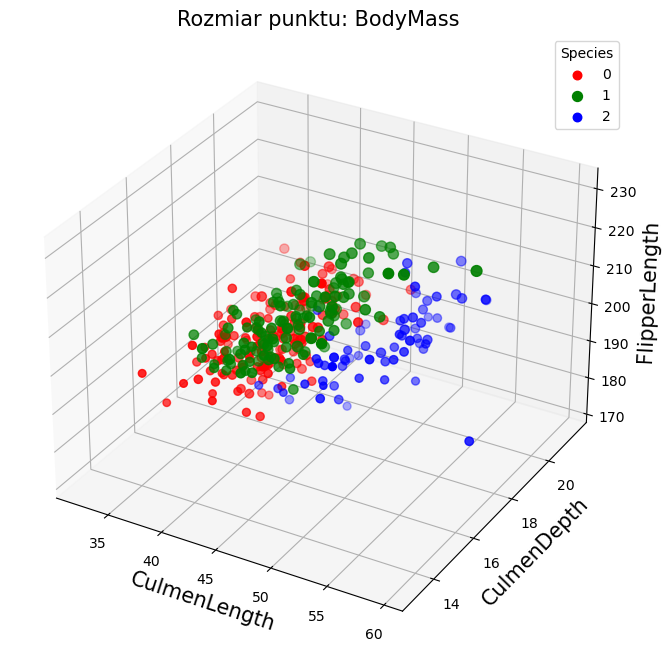

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=pingwiny.loc[pingwiny['Species']== 0, 'CulmenLength'],
                 ys=pingwiny.loc[pingwiny['Species']==0,'CulmenDepth'],
                 zs=pingwiny.loc[pingwiny['Species']==0, 'FlipperLength'],
                 s=pingwiny.loc[pingwiny['Species']==0,'BodyMass']*0.01,
                 c='red', label=0)
img = ax.scatter(xs=pingwiny.loc[pingwiny['Species']==1, 'CulmenLength'],
                 ys=pingwiny.loc[pingwiny['Species']==1,'CulmenDepth'],
                 zs=pingwiny.loc[pingwiny['Species']==1, 'FlipperLength'],
                 s=pingwiny.loc[pingwiny['Species']==1,'BodyMass']*0.01,
                 c='green', label=1)
img = ax.scatter(xs=pingwiny.loc[pingwiny['Species']==2, 'CulmenLength'],
                 ys=pingwiny.loc[pingwiny['Species']==2,'CulmenDepth'],
                 zs=pingwiny.loc[pingwiny['Species']==2, 'FlipperLength'],
                 s=pingwiny.loc[pingwiny['Species']==2,'BodyMass']*0.01,
                 c='blue', label=2)
ax.set_xlabel(xlabel='CulmenLength', size=15)
ax.set_ylabel(ylabel='CulmenDepth', size=15)
ax.set_zlabel(zlabel='FlipperLength', size=15)
ax.set_title('Rozmiar punktu: BodyMass', size=15)
plt.legend(title='Species')
plt.show()

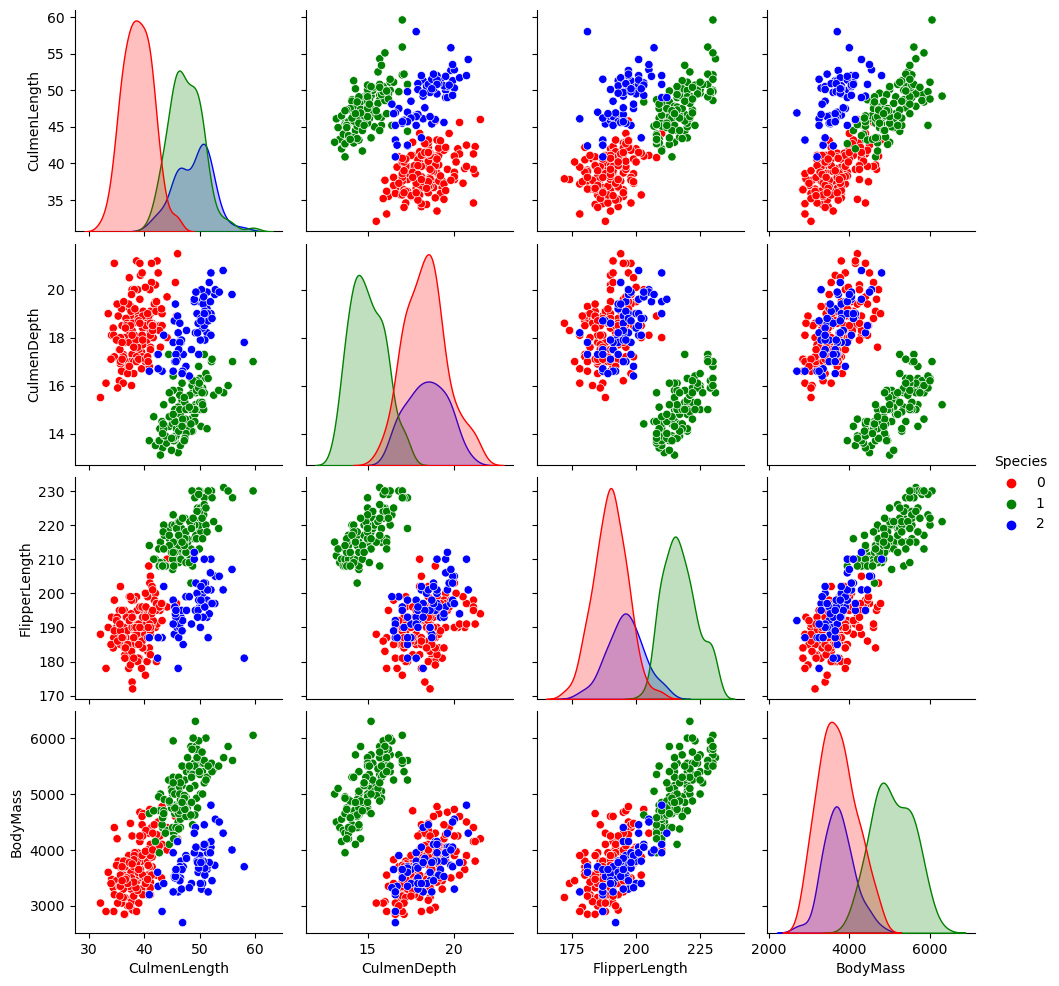

In [9]:
sns.pairplot(pingwiny,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

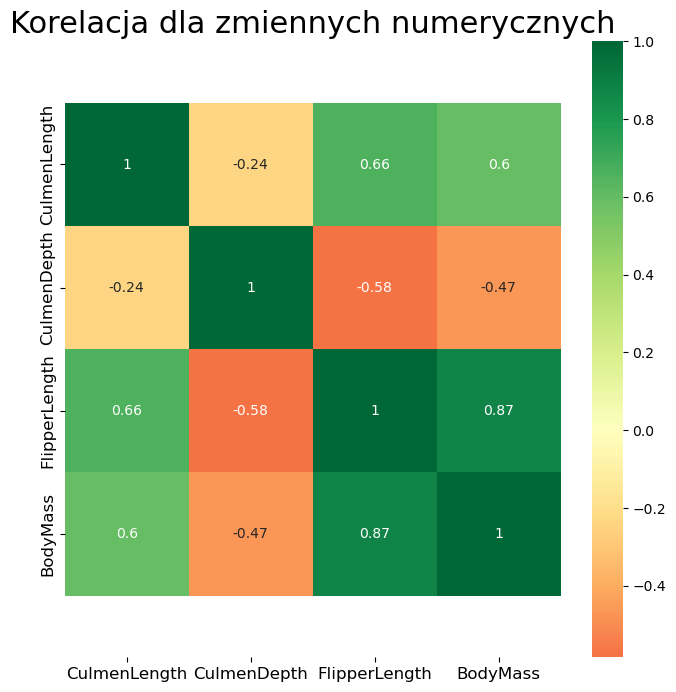

In [10]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pingwiny.drop('Species', axis=1).copy()
y = pingwiny['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_pingwiny = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))

train_pingwiny
train_pingwiny.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_pingwiny[['PC1', 'PC2','PC3','PC4']] = train_pingwiny[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_pingwiny.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,-1.907123e-16,4.272572e-17,-3.829273e-17,0.520499
PC2,-1.907123e-16,1.000000e+00,-1.018731e-16,9.669076e-17,0.530013
PC3,4.272572e-17,-1.018731e-16,1.000000e+00,6.784418e-17,-0.454380
PC4,-3.829273e-17,9.669076e-17,6.784418e-17,1.000000e+00,-0.030119
Species,5.204988e-01,5.300128e-01,-4.543800e-01,-3.011898e-02,1.000000


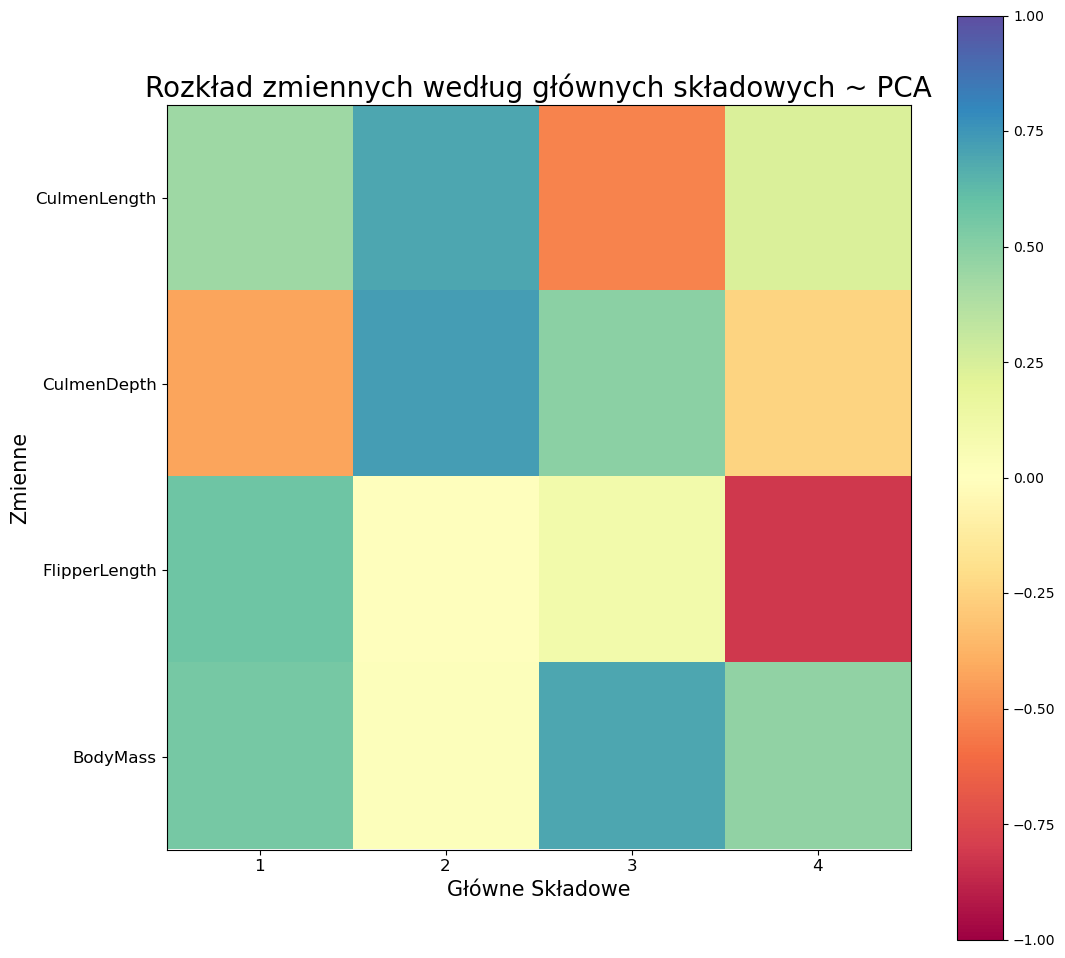

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

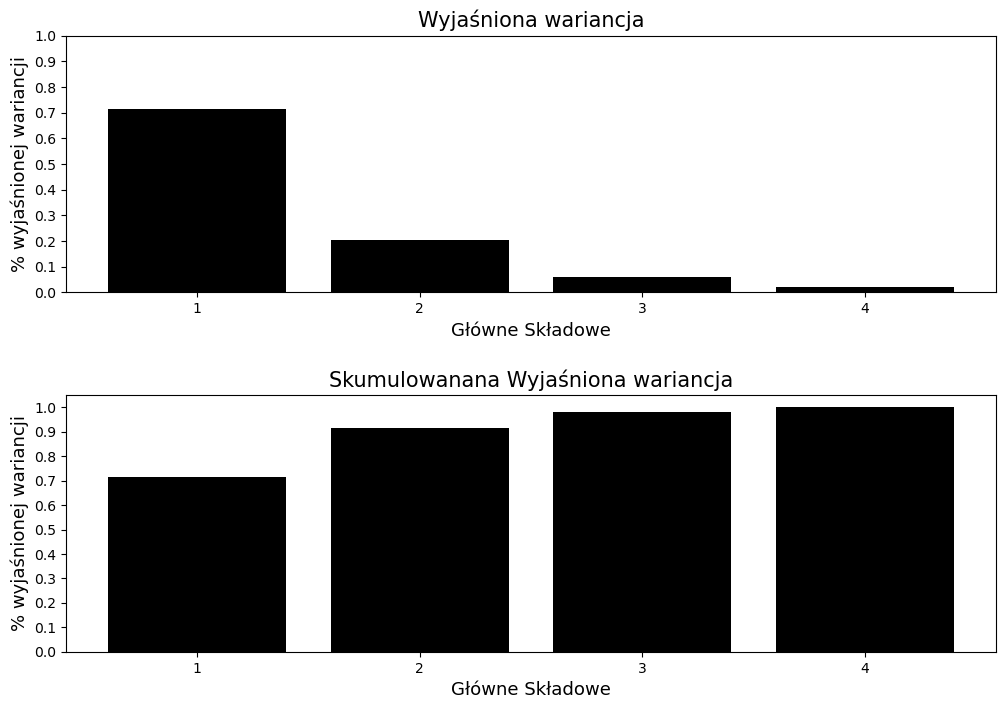

Główna składowa: 1, Wyjaśniona wariancja: 0.7137, Skumulowana Wyjaśniona wariancja: 0.7137
Główna składowa: 2, Wyjaśniona wariancja: 0.20335, Skumulowana Wyjaśniona wariancja: 0.91705
Główna składowa: 3, Wyjaśniona wariancja: 0.06189, Skumulowana Wyjaśniona wariancja: 0.97895
Główna składowa: 4, Wyjaśniona wariancja: 0.02105, Skumulowana Wyjaśniona wariancja: 1.0


In [13]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

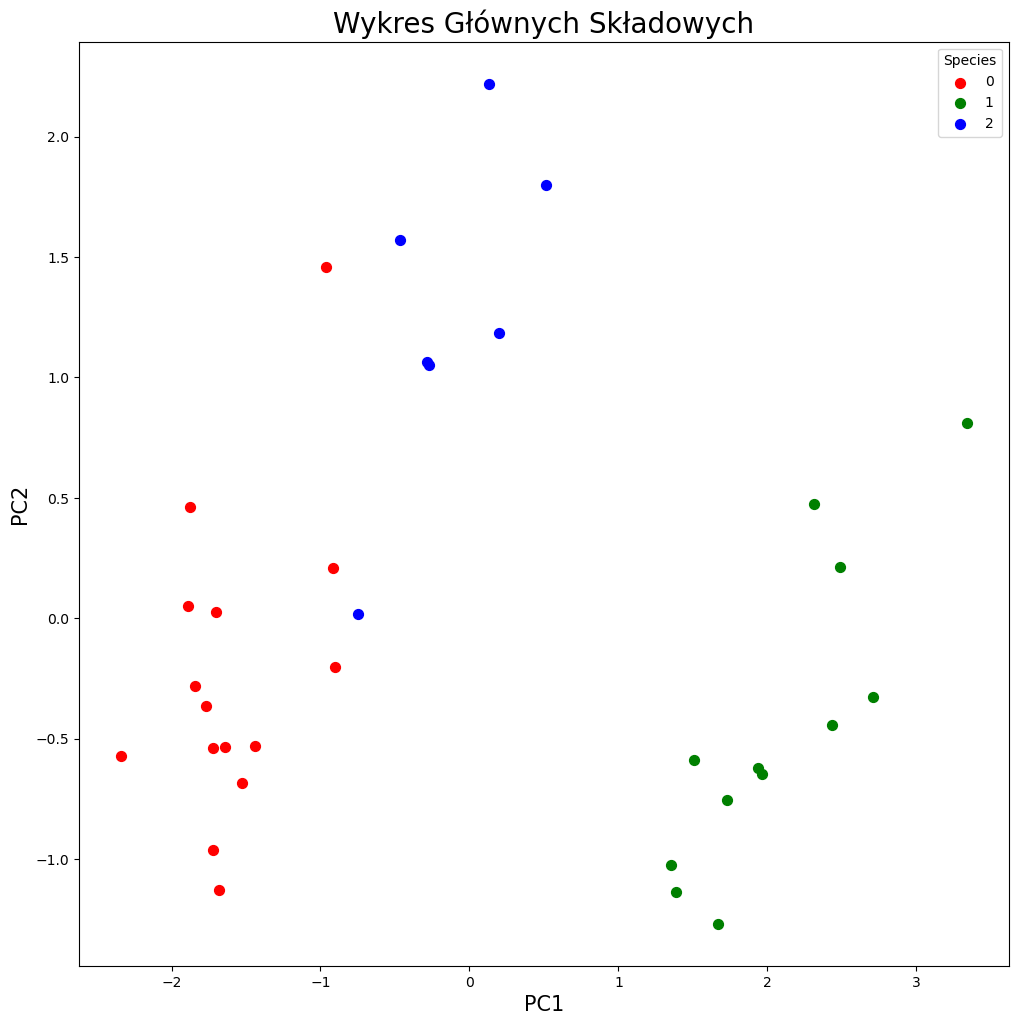

In [14]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_pingwiny.loc[train_pingwiny['Species']== 0, 'PC1'],
            y=train_pingwiny.loc[train_pingwiny['Species']== 0,'PC2'],
            c='red', label='0', s=50)
plt.scatter(x=train_pingwiny.loc[train_pingwiny['Species']== 1, 'PC1'],
            y=train_pingwiny.loc[train_pingwiny['Species']== 1,'PC2'],
            c='green', label='1', s=50)
plt.scatter(x=train_pingwiny.loc[train_pingwiny['Species']== 2, 'PC1'],
            y=train_pingwiny.loc[train_pingwiny['Species']== 2,'PC2'],
            c='blue', label='2', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9545   |             115999             |
|   Skalowane dane  |   0.9643   |              7005              |
|        4 PC       |   0.9643   |              4994              |
|        3 PC       |   0.9643   |              4000              |
|        2 PC       |   0.8994   |              3999              |
|        1 PC       |   0.8831   |              4997              |
+-------------------+------------+--------------------------------+


# Wnioski

Podobnie jak poprzednio - wzięłam wyjątkowo małą próbkę treningową. Tradycyjnie - poszło świetnie. Na 3 głównych składowych można by zbudować o 1% lepszy model niz ostatnio.
Co ciekawe - 4 składowa nic nie wnosi. Dokładność trzech i czterech składowych jest taka sama.